# **Data:**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# User data
user_df = pd.read_csv("Netflix Userbase.csv")
# Eliminates NA values
user_df.dropna()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [3]:
# Content (Movies/shows) dataset
content_df = pd.read_csv("netflix_titles.csv")
# Eliminates NA values
content_df.dropna()
content_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **Data Cleaning:**

In [4]:
content_df.dropna(inplace=True)

In [5]:
# Clean the titles of the columns
content_df = content_df.rename(columns= {"listed_in": "Genre",
                            "show_id": "Show ID",
                            "type": "Type",
                            "title": "Title",
                            "director": "Director",
                            "cast": "Cast",
                            "country": "Country",
                            "date_added": "Date Added",
                            "release_year": "Release Year",
                            "rating": "Age Rating",
                            "duration": "Duration",
                            "description": "Description",
                            })

In [6]:
print(content_df.columns)

Index(['Show ID', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date Added',
       'Release Year', 'Age Rating', 'Duration', 'Genre', 'Description'],
      dtype='object')


In [7]:
print(user_df.columns)

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')


In [8]:
# This function converts seasons into minutes and also gets rid of any str values such as 'min'
def converting_duration(duration):
    if isinstance(duration, str):  # Check if it's a string
        if 'min' in duration:
            return int(duration.replace(' min', ''))  # Extract and convert minutes
        elif 'Season' in duration:
            seasons = int(duration.replace(' Seasons', '').replace(' Season', ''))
            return seasons * 8 * 40  # Assuming 8 episodes/season and 40 minutes/episode
    return None  # Return None for invalid or missing values

# Apply conversion function to the Duration column
content_df['Duration (minutes)'] = content_df['Duration'].apply(converting_duration)

content_df

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Age Rating,Duration,Genre,Description,Duration (minutes)
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2880
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


# **Exploratory Data Analysis:**

In [9]:
# Checking if there are any null values
print(user_df.isnull().sum())
print(content_df.isnull().sum())

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64
Show ID               0
Type                  0
Title                 0
Director              0
Cast                  0
Country               0
Date Added            0
Release Year          0
Age Rating            0
Duration              0
Genre                 0
Description           0
Duration (minutes)    0
dtype: int64


In [10]:
user_df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [12]:
user_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [13]:
# User Count For the Different Subscription Types
fig = go.Figure(data=[go.Histogram(x= user_df["Subscription Type"])])

# This will update the simple histogram that we created
fig.update_layout(
    title="User Count For Subscription Type",
    xaxis_title="Subscription Type",
    yaxis_title="Count",
    font=dict(family="Times New Roman", size=20),
    title_x=0.5,
    title_y=0.9,
    xaxis=dict(showline=True, linecolor="black", linewidth=2, showgrid=True),
    yaxis=dict(showline=True, linecolor="black", linewidth=2, showgrid=True),
    height=600,
)
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)
fig.show()

Based on the histogram, we see that Basic users have a greater number, compared to standard and premium (which is expected). However, what's interesting is that the standard and premium have user counts that are almost similar, which is unexpected. I thought Premium would be way lower than the other types. This visualization can be useful when creating the recommendation system.

In [14]:
# Age Distribution For Netflix Users
fig=go.Figure()

fig.add_trace(go.Histogram(x=user_df["Age"], marker = dict(color= "green", line=dict(color="black", width=1))))

# Rnhancing the Histogram
fig.update_layout(xaxis_title="Age",yaxis_title="Count",title="Age distribution ",
font=dict(family="Times New Roman",size=20),
title_x=0.5,
title_y=0.9,
xaxis=dict(linecolor="black",linewidth=2),
yaxis=dict(showline=True,linecolor="black",linewidth=2),
xaxis_title_font=dict(family="Times New Roman",size=22),
yaxis_title_font=dict(family="Times New Roman",size=22),

)
fig.show()

The Age distribution is consistent across the different Ages. Since the age range is pretty small (26-51) it's hard to gain any valuable insights from this visualization.

In [15]:
# Distribution of Users Across The Different Countries
fig=go.Figure()
fig.add_trace(go.Histogram(x=user_df["Country"],marker=dict(color='brown'),name="Country"))

fig.update_layout(xaxis_title="Country",yaxis_title="Count", title="Users By Country",
font=dict(family="Times New Roman",size=20),
title_x=0.5,
title_y=0.9,
xaxis=dict(linecolor="black",linewidth=2),
yaxis=dict(showline=True,linecolor="black",linewidth=2),
xaxis_title_font=dict(family="Times New Roman",size=22),
yaxis_title_font=dict(family="Times New Roman",size=22),
height=610)

fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)
fig.show()

This plot shows us that the countries with the highest users are the US, Canada, and Spain. Other countries have the same amount of Users. One limitation is that the data only shows users from 10 countries, the rest of the countries are not included.

In [16]:
# Percentage of Device Types
fig=go.Figure()
fig.add_trace(go.Pie(labels=user_df["Device"].value_counts().index,
    values=user_df["Device"].value_counts().values,
    marker=dict(colors=['brown', 'lightblue', 'orange', 'green', 'purple']),
    name="Devices"))

fig.update_layout(
    title="Count By Device Type",
    font=dict(family="Times New Roman", size=20),
    title_x=0.47,
    title_y=0.9,
    height=600)

fig.show()

The users distribution based on device types are almost equal to each other. Although the number of Laptop and Tablet users are greater than smartphones and Smart TV users, the difference is not significant.

In [17]:
# Filtering the User dataset to only relevant columns
relevant_user_data = user_df.loc[:,["User ID", "Subscription Type", "Country", "Device"]]
relevant_user_data

,User ID,Subscription Type,Country,Device
0,1,Basic,United States,Smartphone
1,2,Premium,Canada,Tablet
2,3,Standard,United Kingdom,Smart TV
3,4,Standard,Australia,Laptop
4,5,Basic,Germany,Smartphone
...,...,...,...,...
2495,2496,Premium,Spain,Smart TV
2496,2497,Basic,Spain,Smart TV
2497,2498,Standard,United States,Laptop
2498,2499,Standard,Canada,Tablet


In [18]:
# Filtering the Content dataset to only relevant columns
relevant_content_data = content_df.loc[:, ["Show ID",'Type', "Title","Duration (minutes)", "Country"]]
relevant_content_data

,Show ID,Type,Title,Duration (minutes),Country
7,s8,Movie,Sankofa,125,"United States, Ghana, Burkina Faso, United Kin..."
8,s9,TV Show,The Great British Baking Show,2880,United Kingdom
9,s10,Movie,The Starling,104,United States
12,s13,Movie,Je Suis Karl,127,"Germany, Czech Republic"
24,s25,Movie,Jeans,166,India
...,...,...,...,...,...
8801,s8802,Movie,Zinzana,96,"United Arab Emirates, Jordan"
8802,s8803,Movie,Zodiac,158,United States
8804,s8805,Movie,Zombieland,88,United States
8805,s8806,Movie,Zoom,88,United States


# **Test Recommendations System**

**Device**: This recommendation system is based on the device type. For example, users with a TV will be recommended longer shows/movies compared to users with a Smartphone.

In [19]:
def recommend_movies(user_id, relevant_user_data, relevant_content_data):
    user_info = relevant_user_data[relevant_user_data['User ID'] == user_id].iloc[0]

    # Filter by device type
    if user_info['Device'] == 'Smart TV':
        # longer movies and tv shows since it's TV
        recommended_movies = relevant_content_data[relevant_content_data['Duration (minutes)'] > 100]
    elif user_info['Device'] == 'Smartphone':
       # shorter movies since it's mobile
        recommended_movies = relevant_content_data[relevant_content_data['Duration (minutes)'] <=100 ]
    else:
        # Recommends both short and long content
        recommended_movies = relevant_content_data


    return recommended_movies[['Show ID', 'Title']]


In [20]:
user_id_to_recommend = 5 # Enter User ID
recommended_by_device = recommend_movies(user_id_to_recommend, relevant_user_data, relevant_content_data)
print(f"Recommended Movies for User {user_id_to_recommend}:\n", recommended_by_device)

Recommended Movies for User 5:
      Show ID                                              Title
28       s29                                         Dark Skies
38       s39                                Birth of the Dragon
43       s44                                             Jaws 3
44       s45                                  Jaws: The Revenge
51       s52  InuYasha the Movie 2: The Castle Beyond the Lo...
...      ...                                                ...
8793   s8794                               Yours, Mine and Ours
8794   s8795                                             اشتباك
8801   s8802                                            Zinzana
8804   s8805                                         Zombieland
8805   s8806                                               Zoom

[2592 rows x 2 columns]


**Device and Country**: This recommendation system built upon the previous recommendation system (device), this includes recommendations based on device type and also the country that the user lives in.

In [21]:
def recommend_movies_by_country(user_id, relevant_user_data, relevant_content_data):
    # Get user information
    user_info = relevant_user_data[relevant_user_data['User ID'] == user_id].iloc[0]

    # Filter recommendations based on device type
    if user_info['Device'] == 'Smart TV':
        # Recommend longer movies and shows for Smart TV users
        recommend_movies_by_country = relevant_content_data[relevant_content_data['Duration (minutes)'] > 100]
    elif user_info['Device'] == 'Smartphone':
        # Recommend shorter movies for mobile users
        recommend_movies_by_country = relevant_content_data[relevant_content_data['Duration (minutes)'] <= 100]
    else:
        # Recommend both short and long content for other devices
        recommend_movies_by_country = relevant_content_data

    # Further filter recommendations based on country
    recommend_movies_by_country = recommend_movies_by_country[relevant_content_data['Country'] == user_info['Country']]

    # Return the final filtered list of recommendations
    return recommend_movies_by_country[['Show ID', 'Title', 'Country']]


In [22]:
user_id_for_country = 7 # Enter User ID
recommended_movies_country = recommend_movies_by_country(user_id_for_country, relevant_user_data, relevant_content_data)
print(f"Recommended Movies for User {user_id_for_country}:\n", recommended_movies_country)

Recommended Movies for User 7:
      Show ID                                              Title Country
650     s651                               O Vendedor de Sonhos  Brazil
783     s784                                           Carnaval  Brazil
966     s967                                      Get the Grift  Brazil
1188   s1189                                       Get the Goat  Brazil
1403   s1404                                         Double Dad  Brazil
1532   s1533                            Anitta: Made In Honório  Brazil
1601   s1602                             Just Another Christmas  Brazil
1715   s1716                                    A Queen Is Born  Brazil
1771   s1772                                Afronta! Facing It!  Brazil
1798   s1799                                       Alice Junior  Brazil
2050   s2051                          Afonso Padilha: Classless  Brazil
2302   s2303                              Thiago Ventura: POKAS  Brazil
2563   s2564            Luccas N

# **K-Prototype Clustering**:

This Clustering method involves clustering both Categorical and Numerical data compared to KMeans which only clusters numerical data.

In [23]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler

In [24]:
user_df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [25]:
# Dropping irrelevant columns
user_df = user_df.drop(columns=['Join Date', 'Last Payment Date', 'Plan Duration'])
print(user_df.columns)


Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Country', 'Age',
       'Gender', 'Device'],
      dtype='object')


In [26]:
# Creating different variables for Categorical and Numerical Columns
numerical_columns = ['Monthly Revenue', 'Age']
categorical_columns = ['Subscription Type', 'Country', 'Device', 'Gender', 'User ID']

In [27]:
kproto_df = user_df.copy()

In [28]:
# Scaling data
scaler = StandardScaler()
kproto_df[numerical_columns] = scaler.fit_transform(kproto_df[numerical_columns])

In [29]:
data = kproto_df.values

In [30]:
# Checks the data types and converts it to floats
data_types = [np.float64 if col in numerical_columns else object for col in kproto_df.columns]
categorical_indices = [kproto_df.columns.get_loc(col) for col in categorical_columns]

Elbow Method for determining the number of clusters

In [31]:
costs = []
k_values = range(1, 10)

In [32]:
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    kproto.fit_predict(data, categorical=categorical_indices)
    costs.append(kproto.cost_)

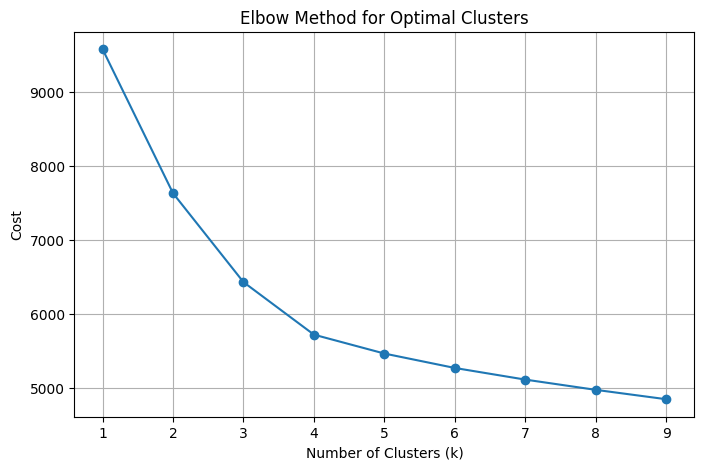

In [33]:
# Elbow plot for optimal cluster number
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Clusters')
plt.grid()
plt.show()

Looking at the Elbow Plot, it looks as though the optimal number of clusters is 4.

In [34]:
# Running KPrototype clustering with optimal number of clusters
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=1)
clusters = kproto.fit_predict(data, categorical=categorical_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 607, ncost: 6288.301632174249
Run: 1, iteration: 2/100, moves: 139, ncost: 6271.29376149556
Run: 1, iteration: 3/100, moves: 211, ncost: 6161.30702551442
Run: 1, iteration: 4/100, moves: 406, ncost: 5867.361775267534
Run: 1, iteration: 5/100, moves: 309, ncost: 5731.892115532858
Run: 1, iteration: 6/100, moves: 105, ncost: 5717.27705297633
Run: 1, iteration: 7/100, moves: 61, ncost: 5712.468871582121
Run: 1, iteration: 8/100, moves: 23, ncost: 5711.776921644568
Run: 1, iteration: 9/100, moves: 17, ncost: 5711.083388578266
Run: 1, iteration: 10/100, moves: 9, ncost: 5710.8640978117965
Run: 1, iteration: 11/100, moves: 12, ncost: 5710.457881111468
Run: 1, iteration: 12/100, moves: 9, ncost: 5710.211349485807
Run: 1, iteration: 13/100, moves: 0, ncost: 5710.211349485807
Init: initializing centroids
Init

In [35]:
user_df['Cluster'] = clusters

In [36]:
# Analyzing clusters
print("Clustered Data:")
print(user_df)
print("\nCluster Centroids:")
print(kproto.cluster_centroids_)

Clustered Data:
      User ID Subscription Type  Monthly Revenue         Country  Age  Gender  \
0           1             Basic               10   United States   28    Male   
1           2           Premium               15          Canada   35  Female   
2           3          Standard               12  United Kingdom   42    Male   
3           4          Standard               12       Australia   51  Female   
4           5             Basic               10         Germany   33    Male   
...       ...               ...              ...             ...  ...     ...   
2495     2496           Premium               14           Spain   28  Female   
2496     2497             Basic               15           Spain   33  Female   
2497     2498          Standard               12   United States   38    Male   
2498     2499          Standard               13          Canada   48  Female   
2499     2500             Basic               15   United States   35  Female   

          D

In [37]:
user_df

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Cluster
0,1,Basic,10,United States,28,Male,Smartphone,3
1,2,Premium,15,Canada,35,Female,Tablet,0
2,3,Standard,12,United Kingdom,42,Male,Smart TV,2
3,4,Standard,12,Australia,51,Female,Laptop,1
4,5,Basic,10,Germany,33,Male,Smartphone,3
...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,Spain,28,Female,Smart TV,0
2496,2497,Basic,15,Spain,33,Female,Smart TV,0
2497,2498,Standard,12,United States,38,Male,Laptop,3
2498,2499,Standard,13,Canada,48,Female,Tablet,2


**Visualizing clusters**: since it is difficult to plot the clusters as it is we have categorical and numerical data. We will use t-SNE to create a 2D visualizatin and then use  a scatter plot to visualize the different clusters.




In [38]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

In [39]:
encoder = OneHotEncoder(sparse_output=False)
categorical_encoded = encoder.fit_transform(user_df[categorical_columns])
numerical_data = user_df[numerical_columns].values
combined_data = pd.DataFrame(
    data=np.hstack((numerical_data, categorical_encoded))
)

In [40]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(combined_data)

In [41]:
user_df['tsne-2d-one'] = tsne_results[:, 0]
user_df['tsne-2d-two'] = tsne_results[:, 1]

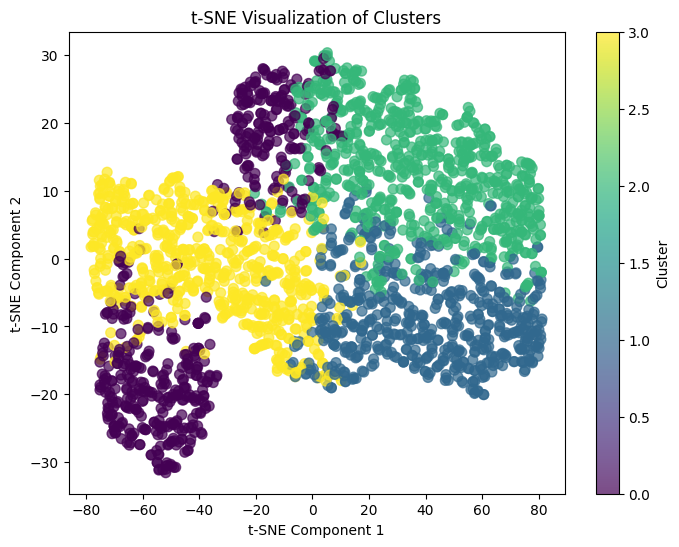

In [42]:
# Visual of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    user_df['tsne-2d-one'],
    user_df['tsne-2d-two'],
    c=user_df['Cluster'],
    cmap='viridis',
    alpha=0.7,
    s=50
)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster')
plt.show()

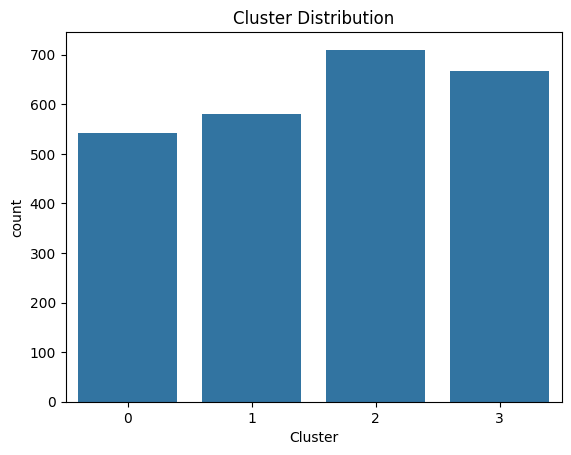

In [43]:
# Users per Clusters
sns.countplot(x='Cluster', data=user_df)
plt.title('Cluster Distribution')
plt.show()

Cluster 0 and 2 have more users compared to 1 and 3, but the difference is not too significant.

In [44]:
# Summarizing the Numerical Columns
numerical_summary = user_df.groupby('Cluster')[numerical_columns].agg(['mean', 'median', 'std'])
print("Numerical Features Summary:")
print(numerical_summary)

Numerical Features Summary:
        Monthly Revenue                         Age                 
                   mean median       std       mean median       std
Cluster                                                             
0             14.127306   14.0  0.797658  32.202952   32.0  3.532180
1             10.936317   11.0  0.826963  45.044750   45.0  3.798102
2             13.829577   14.0  0.868163  44.447887   44.0  3.970550
3             11.155922   11.0  0.883435  32.692654   33.0  3.565769


In [45]:
# Summarizing Categorical Columns
categorical_summary = {}
for col in categorical_columns:
    categorical_summary[col] = user_df.groupby('Cluster')[col].agg(lambda x: x.mode()[0])
categorical_summary = pd.DataFrame(categorical_summary)
print("\nCategorical Features Summary:")
print(categorical_summary)


Categorical Features Summary:
        Subscription Type        Country      Device  Gender  User ID
Cluster                                                              
0                   Basic          Spain      Tablet  Female        2
1                   Basic          Spain      Tablet  Female        4
2                   Basic  United States      Laptop    Male        3
3                   Basic  United States  Smartphone    Male        1


In [46]:
# Count of Categorical variables in each cluster
for col in categorical_columns:
    print(f"\nCategory Distribution for {col}:")
    print(user_df.groupby('Cluster')[col].value_counts())


Category Distribution for Subscription Type:
Cluster  Subscription Type
0        Basic                213
         Premium              181
         Standard             148
1        Basic                239
         Standard             185
         Premium              157
2        Basic                280
         Standard             217
         Premium              213
3        Basic                267
         Standard             218
         Premium              182
Name: count, dtype: int64

Category Distribution for Country:
Cluster  Country       
0        Spain             122
         United States      85
         Canada             73
         Brazil             45
         Italy              41
         France             40
         United Kingdom     39
         Australia          35
         Germany            33
         Mexico             29
1        Spain             122
         United States      94
         Canada             71
         Brazil             45

In [47]:
# Device Type Distribution Per Clusters
device_distribution = user_df.groupby('Cluster')['Device'].value_counts()
print("Device Distribution in Clusters:")
print(device_distribution)

Device Distribution in Clusters:
Cluster  Device    
0        Tablet        167
         Smart TV      136
         Laptop        131
         Smartphone    108
1        Tablet        167
         Smartphone    150
         Smart TV      133
         Laptop        131
2        Laptop        225
         Smart TV      168
         Smartphone    163
         Tablet        154
3        Smartphone    200
         Smart TV      173
         Laptop        149
         Tablet        145
Name: count, dtype: int64


In [48]:
# subscription Distribution Per Cluster
subscription_distribution = user_df.groupby('Cluster')['Subscription Type'].value_counts()
print("\nSubscription Type Distribution in Clusters:")
print(subscription_distribution)


Subscription Type Distribution in Clusters:
Cluster  Subscription Type
0        Basic                213
         Premium              181
         Standard             148
1        Basic                239
         Standard             185
         Premium              157
2        Basic                280
         Standard             217
         Premium              213
3        Basic                267
         Standard             218
         Premium              182
Name: count, dtype: int64


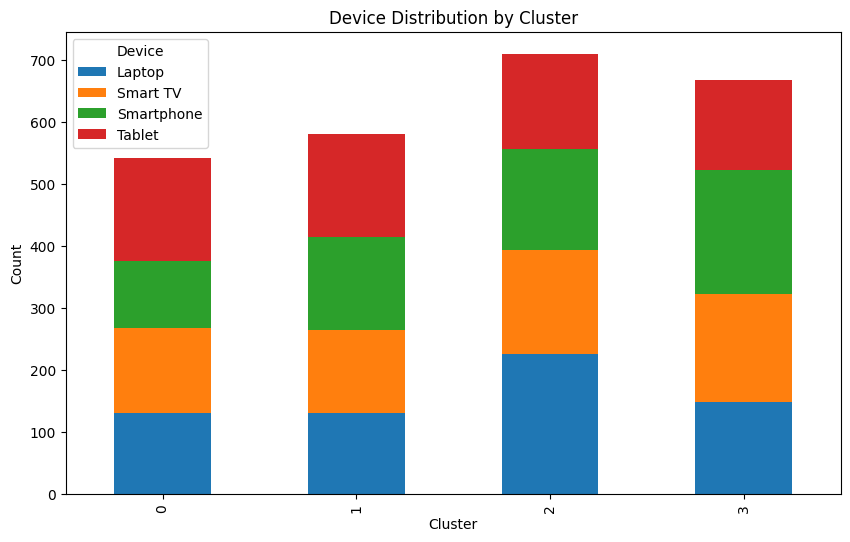

In [49]:
# Device Distribution Bar Plot
device_distribution.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Device Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Device")
plt.show()

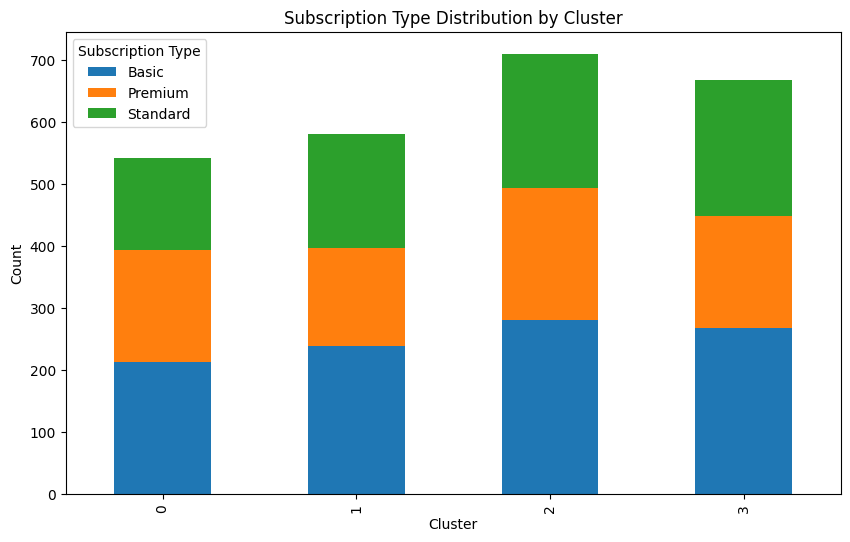

In [50]:
# Subscription Distribution Bar Plot
subscription_distribution.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Subscription Type Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Subscription Type")
plt.show()

**Summary/Reflection**:
- The Devices are nicely categorized into the different clusters, each cluster has a different devices type with the highest counts, for the most part. this can be used to recommend different content to different customers.
- Looking at the summaries and the plots, we can see that the clusters are dominated by basic subsctiption types, however in some clusters there are more premium/standard users compared to other clusters. For example, cluster 1 has the highest number of premium customers compared to the other 3 clusters. However, Since the clusters are the same for the most part it will be challenging to make a recommendation system that is persomalized.
- Overall, This clustering method can be used to make a recommendation system, but let's try KModes Clustering as well.

# Let's also try KModes clustering

In [51]:
from kmodes.kmodes import KModes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [52]:
# The main columns we need to make the recommendation system is Subscription Type, Country, Device, Age, and User ID
new_revised_user_df =  user_df.loc[:,["User ID","Age" ,"Subscription Type", "Country", "Device"]]
new_revised_user_df = new_revised_user_df.astype(str)

In [53]:
# Transforming Categorical values (Device type, subscription Type, and Country)
Categorical_encoder = OneHotEncoder(sparse_output=False)
Cat_encoded_data = Categorical_encoder.fit_transform(new_revised_user_df[['Device', 'Subscription Type', 'Country']])
print(Cat_encoded_data)

[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


In [54]:
cat_encoded_columns = Categorical_encoder.get_feature_names_out(['Device', 'Subscription Type','Country'])
cat_encoded_columns

array(['Device_Laptop', 'Device_Smart TV', 'Device_Smartphone',
       'Device_Tablet', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_Italy',
       'Country_Mexico', 'Country_Spain', 'Country_United Kingdom',
       'Country_United States'], dtype=object)

In [55]:
# Combining encoded data with encoded columns
processed_data = pd.DataFrame(Cat_encoded_data, columns= cat_encoded_columns)
processed_data["Age"] = user_df["Age"]
processed_data

,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Country_Australia,Country_Brazil,Country_Canada,Country_France,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Age
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,28
2496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33
2497,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38
2498,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48


In [56]:
# Scaling the transformed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)
scaled_data = pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.584125,-0.568112,1.739473,-0.582277,1.225766,-0.644071,-0.665896,-0.281036,-0.281036,-0.381068,-0.281036,-0.281036,-0.281036,-0.281036,-0.469156,-0.281036,2.131487,-1.505590
1,-0.584125,-0.568112,-0.574887,1.717395,-0.815816,1.552624,-0.665896,-0.281036,-0.281036,2.624202,-0.281036,-0.281036,-0.281036,-0.281036,-0.469156,-0.281036,-0.469156,-0.529347
2,-0.584125,1.760216,-0.574887,-0.582277,-0.815816,-0.644071,1.501735,-0.281036,-0.281036,-0.381068,-0.281036,-0.281036,-0.281036,-0.281036,-0.469156,3.558258,-0.469156,0.446896
3,1.711963,-0.568112,-0.574887,-0.582277,-0.815816,-0.644071,1.501735,3.558258,-0.281036,-0.381068,-0.281036,-0.281036,-0.281036,-0.281036,-0.469156,-0.281036,-0.469156,1.702066
4,-0.584125,-0.568112,1.739473,-0.582277,1.225766,-0.644071,-0.665896,-0.281036,-0.281036,-0.381068,-0.281036,3.558258,-0.281036,-0.281036,-0.469156,-0.281036,-0.469156,-0.808274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.584125,1.760216,-0.574887,-0.582277,-0.815816,1.552624,-0.665896,-0.281036,-0.281036,-0.381068,-0.281036,-0.281036,-0.281036,-0.281036,2.131487,-0.281036,-0.469156,-1.505590
2496,-0.584125,1.760216,-0.574887,-0.582277,1.225766,-0.644071,-0.665896,-0.281036,-0.281036,-0.381068,-0.281036,-0.281036,-0.281036,-0.281036,2.131487,-0.281036,-0.469156,-0.808274
2497,1.711963,-0.568112,-0.574887,-0.582277,-0.815816,-0.644071,1.501735,-0.281036,-0.281036,-0.381068,-0.281036,-0.281036,-0.281036,-0.281036,-0.469156,-0.281036,2.131487,-0.110957
2498,-0.584125,-0.568112,-0.574887,1.717395,-0.815816,-0.644071,1.501735,-0.281036,-0.281036,2.624202,-0.281036,-0.281036,-0.281036,-0.281036,-0.469156,-0.281036,-0.469156,1.283676


To run a KModess cluster we need to determine the optimal number of clusters needed for the clustering. Using the elbow method will help us determine the optimal number of clusters.

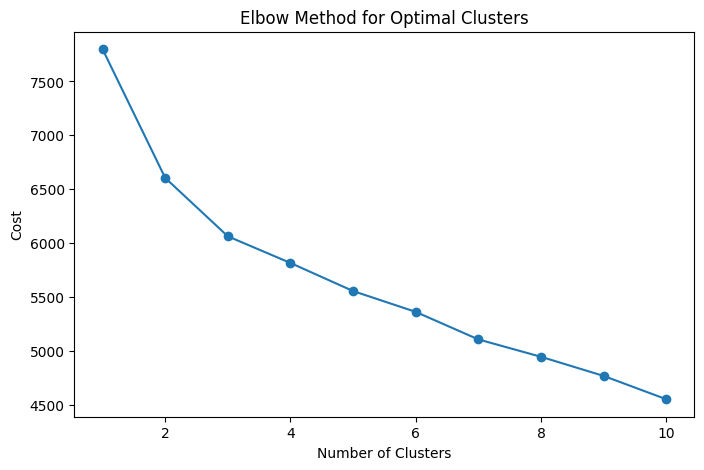

In [57]:
cost = []
for num_clusters in range(1, 11):  # Testing clusters from 1 to 10
    k_modes = KModes(n_clusters=num_clusters, init="Cao", n_init=5, verbose=0)
    k_modes.fit(new_revised_user_df.iloc[:, 1:])  # Exclude "User ID"
    cost.append(k_modes.cost_)

# Graph to determine where the elbow is
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cost, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

Based on the graph it looks like the optimal number of clusters is 2-4. Since our device options are 4, I will choose 4.

In [58]:
optimal_clusters = 4
k_modes = KModes(n_clusters=optimal_clusters, init="Cao", n_init=5, verbose=1)
user_df['Cluster_by_KModes'] = k_modes.fit_predict(new_revised_user_df.iloc[:, 1:])  # Exclude "User ID"
user_df

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5818.0


,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Cluster,tsne-2d-one,tsne-2d-two,Cluster_by_KModes
0,1,Basic,10,United States,28,Male,Smartphone,3,-74.001961,11.049082,0
1,2,Premium,15,Canada,35,Female,Tablet,0,-16.511086,20.176949,2
2,3,Standard,12,United Kingdom,42,Male,Smart TV,2,25.322376,4.810495,1
3,4,Standard,12,Australia,51,Female,Laptop,1,78.594620,-2.109551,0
4,5,Basic,10,Germany,33,Male,Smartphone,3,-32.610474,-6.751006,3
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,Spain,28,Female,Smart TV,0,-69.606743,-25.690254,2
2496,2497,Basic,15,Spain,33,Female,Smart TV,0,-41.395134,-20.858791,3
2497,2498,Standard,12,United States,38,Male,Laptop,3,-3.072739,-3.991503,0
2498,2499,Standard,13,Canada,48,Female,Tablet,2,64.093033,4.334774,1


In [59]:
user_df[['User ID', "Device",'Subscription Type','Cluster_by_KModes']]

,User ID,Device,Subscription Type,Cluster_by_KModes
0,1,Smartphone,Basic,0
1,2,Tablet,Premium,2
2,3,Smart TV,Standard,1
3,4,Laptop,Standard,0
4,5,Smartphone,Basic,3
...,...,...,...,...
2495,2496,Smart TV,Premium,2
2496,2497,Smart TV,Basic,3
2497,2498,Laptop,Standard,0
2498,2499,Tablet,Standard,1


In [60]:
# This shows the information based on clusters
user_df.groupby('Cluster_by_KModes').get_group(1)

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Cluster,tsne-2d-one,tsne-2d-two,Cluster_by_KModes
2,3,Standard,12,United Kingdom,42,Male,Smart TV,2,25.322376,4.810495,1
6,7,Standard,12,Brazil,46,Male,Tablet,1,51.887474,-4.639698,1
8,9,Standard,12,Spain,37,Male,Smartphone,3,-6.316144,-1.938912,1
14,15,Standard,12,Germany,38,Female,Smart TV,3,-6.812767,3.523097,1
15,16,Premium,15,France,36,Male,Tablet,0,-17.448433,24.368340,1
...,...,...,...,...,...,...,...,...,...,...,...
2487,2488,Standard,11,United Kingdom,29,Female,Smartphone,3,-63.565887,1.783511,1
2489,2490,Standard,10,Germany,35,Male,Smart TV,3,-26.483059,-5.392187,1
2492,2493,Standard,11,Mexico,33,Male,Smart TV,3,-38.336437,8.365025,1
2493,2494,Premium,12,Spain,36,Male,Smart TV,3,-13.696822,4.116981,1


In [61]:
# Device Preference by Cluster
device_counts = user_df.groupby(['Cluster_by_KModes', 'Device']).size().unstack(fill_value=0)
device_percentage = device_counts.div(device_counts.sum(axis=1), axis=0) * 100
print("Device Preferences by Cluster (Counts):\n", device_counts)
print("\nDevice Preferences by Cluster (Percentage):\n", device_percentage)

Device Preferences by Cluster (Counts):
 Device             Laptop  Smart TV  Smartphone  Tablet
Cluster_by_KModes                                      
0                     570       283          72     238
1                      36       210         141     347
2                      24        91         231      40
3                       6        26         177       8

Device Preferences by Cluster (Percentage):
 Device                Laptop   Smart TV  Smartphone     Tablet
Cluster_by_KModes                                             
0                  49.011178  24.333620    6.190886  20.464316
1                   4.904632  28.610354   19.209809  47.275204
2                   6.217617  23.575130   59.844560  10.362694
3                   2.764977  11.981567   81.566820   3.686636


Cluster  is mix users with more Laptop users and also TV and Tablet users, cluster 1 is Smart TV and Tablet users, cluster 2 and 3 is Smartphone users.

<Figure size 1000x500 with 0 Axes>

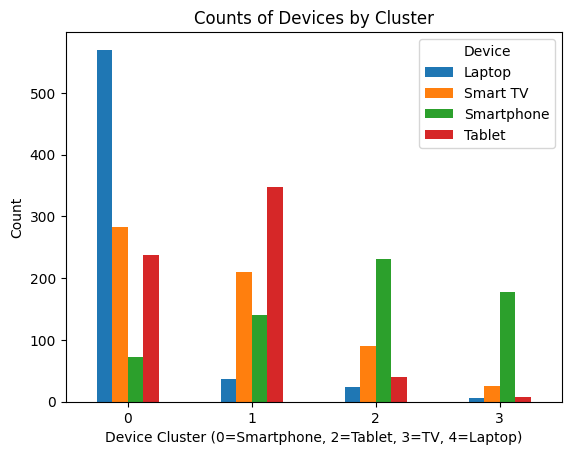

In [62]:
# Barplot for count of devices by cluster
plt.figure(figsize=(10, 5))
device_counts.plot(kind='bar', title='Counts of Devices by Cluster')
plt.xlabel('Device Cluster (0=Smartphone, 2=Tablet, 3=TV, 4=Laptop)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [63]:
# Let's analyze Country
country_counts = user_df.groupby(['Cluster_by_KModes', 'Country']).size().unstack(fill_value=0)
country_percentage = country_counts.div(country_counts.sum(axis=1), axis=0) * 100
print("Country Preferences by Cluster (Counts):\n", country_counts)
print("\nCountry Preferences by Cluster (Percentage):\n", country_percentage)

Country Preferences by Cluster (Counts):
 Country            Australia  Brazil  Canada  France  Germany  Italy  Mexico  \
Cluster_by_KModes                                                              
0                         63     110     118      66      127    134      46   
1                         58      14      43      27       22      3     127   
2                         52      18     149      81        3      5       3   
3                         10      41       7       9       31     41       7   

Country            Spain  United Kingdom  United States  
Cluster_by_KModes                                        
0                     72              47            380  
1                    275             129             36  
2                     42               1             32  
3                     62               6              3  

Country Preferences by Cluster (Percentage):
 Country            Australia     Brazil     Canada     France    Germany  \
Cluste

In [64]:
# Subscription Type
subscription_counts = user_df.groupby(['Cluster_by_KModes', 'Subscription Type']).size().unstack(fill_value=0)
subscription_percentage = subscription_counts.div(subscription_counts.sum(axis=1), axis=0) * 100
print("Subscription Preferences by Cluster (Counts):\n", subscription_counts)
print("\nSubscription Preferences by Cluster (Percentage):\n", subscription_percentage)

Subscription Preferences by Cluster (Counts):
 Subscription Type  Basic  Premium  Standard
Cluster_by_KModes                          
0                    724      236       203
1                     40      173       521
2                     40      314        32
3                    195       10        12

Subscription Preferences by Cluster (Percentage):
 Subscription Type      Basic    Premium   Standard
Cluster_by_KModes                                 
0                  62.252794  20.292347  17.454858
1                   5.449591  23.569482  70.980926
2                  10.362694  81.347150   8.290155
3                  89.861751   4.608295   5.529954


Cluster 0 and 3 are majority Basic, cluster 1 is standard, cluster 3 is Premium.

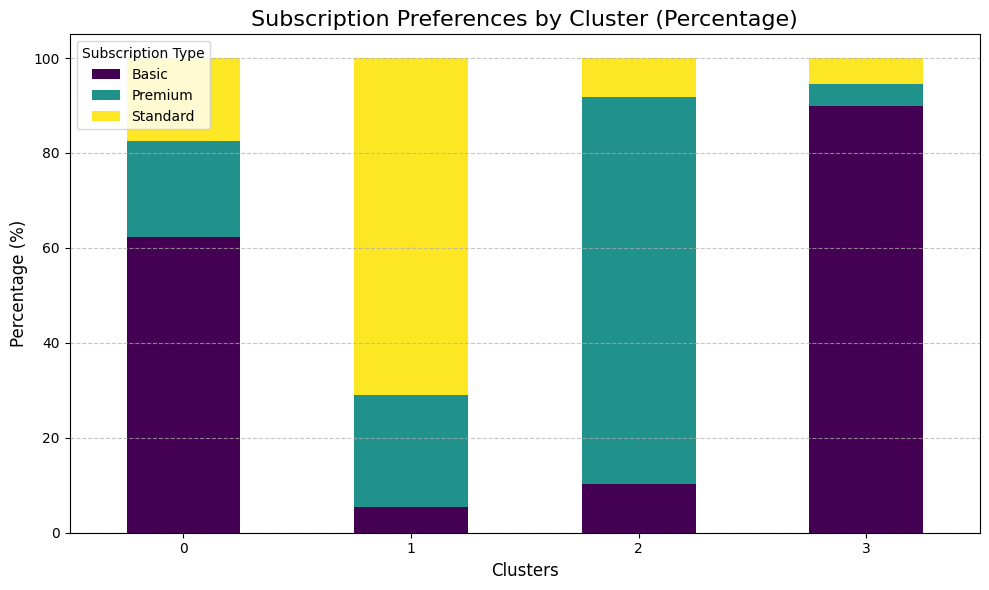

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

subscription_percentage.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Subscription Preferences by Cluster (Percentage)', fontsize=16)
ax.set_xlabel('Clusters', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Subscription Type', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [66]:
# Creating Age Buckets to segment customers by Age
def age_bucket(age):
    if age < 27:
        return '18-26'
    elif 27 <= age < 35:
        return '27-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    else:
        return '55+'

user_df['Age Bucket'] = user_df['Age'].apply(age_bucket)

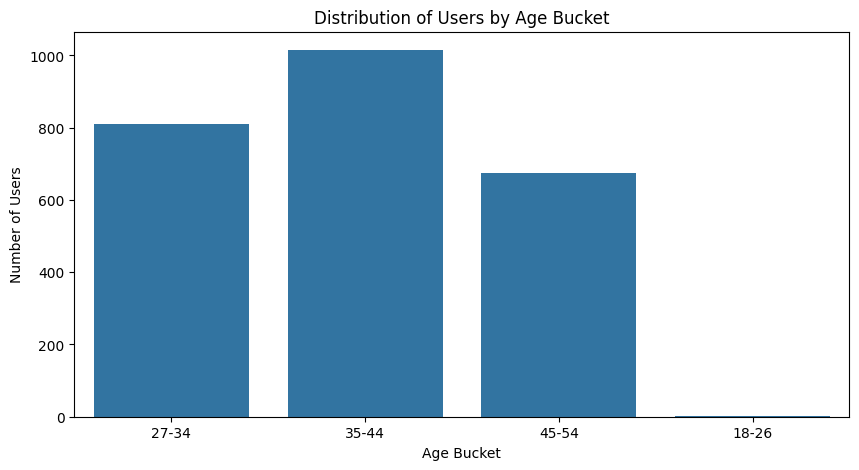

In [67]:
# Assuming 'Age Bucket' is a categorical column in user_df
plt.figure(figsize=(10, 5))
sns.countplot(data=user_df, x='Age Bucket')
plt.title('Distribution of Users by Age Bucket')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Users')
plt.show()


In [68]:
user_df

,User ID,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Cluster,tsne-2d-one,tsne-2d-two,Cluster_by_KModes,Age Bucket
0,1,Basic,10,United States,28,Male,Smartphone,3,-74.001961,11.049082,0,27-34
1,2,Premium,15,Canada,35,Female,Tablet,0,-16.511086,20.176949,2,35-44
2,3,Standard,12,United Kingdom,42,Male,Smart TV,2,25.322376,4.810495,1,35-44
3,4,Standard,12,Australia,51,Female,Laptop,1,78.594620,-2.109551,0,45-54
4,5,Basic,10,Germany,33,Male,Smartphone,3,-32.610474,-6.751006,3,27-34
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,Spain,28,Female,Smart TV,0,-69.606743,-25.690254,2,27-34
2496,2497,Basic,15,Spain,33,Female,Smart TV,0,-41.395134,-20.858791,3,27-34
2497,2498,Standard,12,United States,38,Male,Laptop,3,-3.072739,-3.991503,0,35-44
2498,2499,Standard,13,Canada,48,Female,Tablet,2,64.093033,4.334774,1,45-54


Summary/Reflection:
- Looking at the clustering for categories like device and subscription type, KModes clusters users nicely compared to KProtoype. for example, cluster 0 and 3 are users that have a Basic subscription, Cluster 1 is mainly Standard, and Cluster 2 is mainly Premium. Comparing this with Kprototype, this is way better.
- Clustering based on Country is also somewhat better than Kprototype (which had an equal distribution of users from each countries).
- Although we could use both clustering methods for the recommendation system, I will use the KModes clustering since it did a better job at clustering users.

# **Main Recommendation System:**

This recommendation model uses the clusters from KModes clustering to recommend content, with other filters that make it more personalized.
-

In [88]:
def recommend_based_on_clusters(user_id, user_df, content_df):
  # user information
  user_info = user_df[user_df['User ID'] == user_id]
  cluster = user_info['Cluster'].values[0]
  subscription_type = user_info['Subscription Type'].values[0]
  user_country = user_info['Country'].values[0]
  current_year = 2024
  recommended_movies = content_df.copy()

  if cluster == 3:  # (Smartphone & Basic users) Smartphone users prefer shorter content, Basic focus on popular, broader-appeal movies
      recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] <= 90) & (recommended_movies['Release Year'] < 2022)]
  elif cluster == 1:  # (Tablet & Standard users) Tablet users get a mix, favoring shorter content, Standard users: recent and moderately popular content
      recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] <= 120) & ((recommended_movies['Release Year'] >= 2015) | (recommended_movies['Release Year'] <= 2023))]
  elif cluster == 2:  # (TV/Smartphone & Premium users) TV and smartphone users prefer content that is either long or short, Premium users: access to newer, high-quality content
      recommended_movies = recommended_movies[((recommended_movies['Duration (minutes)'] > 120) | (recommended_movies['Duration (minutes)'] < 90)) & (recommended_movies['Release Year'] >= 2020)]
  elif cluster == 0:  # (Laptop & Basic users) Laptop users get a flexible range of durations, Basic focus on popular, broader-appeal movies
      recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] >= 60) | (recommended_movies['Duration (minutes)'] <= 150) & (recommended_movies['Release Year'] < 2022)]

    # Country-based filtering (matching content with user country because of Language preference)
  recommended_movies = recommended_movies[recommended_movies['Country'] == user_country]

    # There should be at least 5 recommendations
  if len(recommended_movies) < 5:
      # First relaxation: drop country filter
       recommended_movies = content_df[(content_df['Duration (minutes)'] <= 150) &
                                        (content_df['Release Year'] >= 2000)]  # Broader duration and year range

        # Applying device and subscription filters again to ensure relevance (SAME AS ABOVE)
       if cluster == 3:
          recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] <= 90) & (recommended_movies['Release Year'] < 2022)]
       elif cluster == 1:
          recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] <= 120) & ((recommended_movies['Release Year'] >= 2015) | (recommended_movies['Release Year'] <= 2023))]
       elif cluster == 2:
          recommended_movies = recommended_movies[((recommended_movies['Duration (minutes)'] > 120) | (recommended_movies['Duration (minutes)'] < 90)) & (recommended_movies['Release Year'] >= 2020)]
       elif cluster == 0:
          recommended_movies = recommended_movies[(recommended_movies['Duration (minutes)'] >= 60) & (recommended_movies['Duration (minutes)'] <= 150) & (recommended_movies['Release Year'] < 2022)]

    # Select the top 5 recommendations after applying relaxed filters if needed
  return recommended_movies.head(6)[["Show ID", "Title", "Country", 'Release Year', 'Duration (minutes)']]



In [93]:
# Recommendation for specific user
user_id_for_recommendation = 11
recommendations = recommend_based_on_clusters(user_id_for_recommendation, user_df, content_df)
print(f"\nRecommended Movies for User {user_id_for_recommendation}:\n")
recommendations


Recommended Movies for User 11:



,Show ID,Title,Country,Release Year,Duration (minutes)
107,s108,A Champion Heart,United States,2018,90
152,s153,Janoskians: Untold and Untrue,United States,2016,88
163,s164,My Boss's Daughter,United States,2003,86
170,s171,Rhyme & Reason,United States,1997,89
173,s174,Snervous Tyler Oakley,United States,2015,83
229,s230,The Old Ways,United States,2020,90
